In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

In [5]:
def logistic(r, x):
    return r * x * (1 - x)

<IPython.core.display.Javascript object>


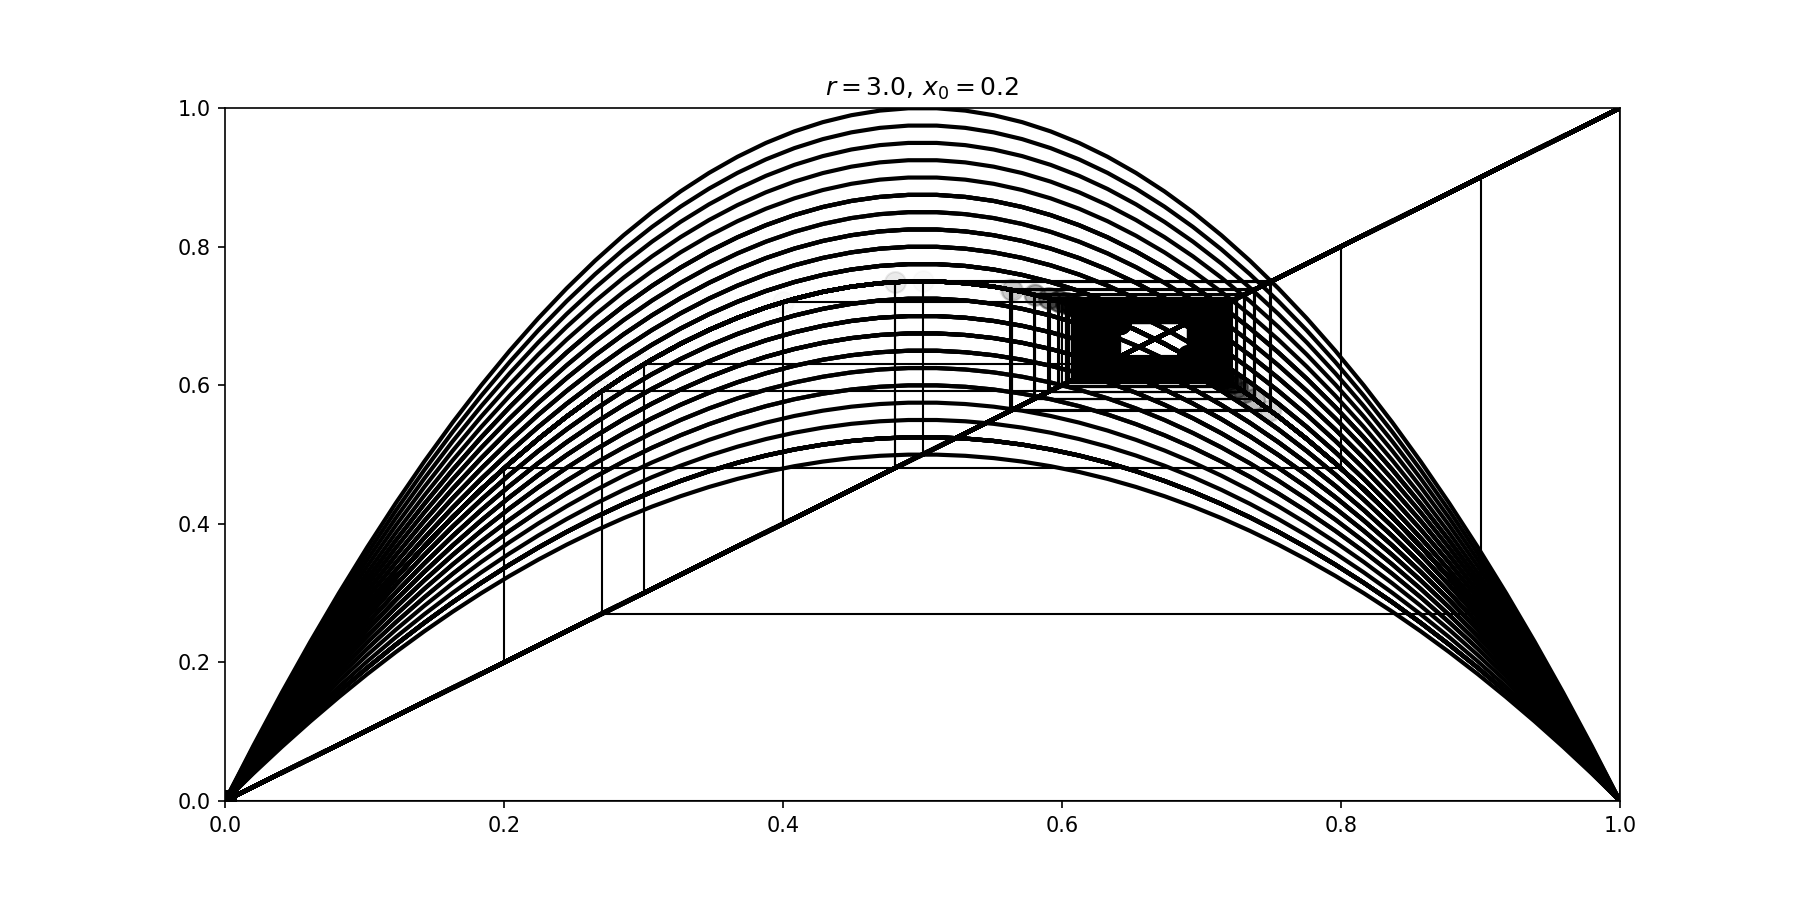

interactive(children=(FloatSlider(value=2.0, description='r', max=4.0), FloatSlider(value=2.0, description='x0…

<function __main__.plot_system(r, x0, n)>

In [12]:
def plot_system(r, x0, n):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, logistic(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = logistic(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                               sharey=True)
interact(plot_system, r=(0,4,0.1), x0=(0,4,0.1), n=(10,50, 1))

In [ ]:
from numba import jit
@jit(nopython=True)
def mandelbrot(largeur, hauteur, max_iteration, xmin, xmax, ymin, ymax):
    mandelbrot_mat = np.zeros((largeur, hauteur))
    for x in range(hauteur):
        cx = (x * (xmax - xmin) / hauteur + xmin)
        for y in range(largeur):
            cy = (y * (ymin - ymax) / largeur + ymax)
            xn, yn, n = 0, 0, 0
            while (xn**2 + yn**2) < 4 and n < max_iteration:
                tmp_x, tmp_y = xn, yn
                xn = tmp_x**2 - tmp_y**2 + cx
                yn = 2 * tmp_x * tmp_y + cy
                n = n + 1
            if n < max_iteration:
                mandelbrot_mat[y, x] = 1
    return mandelbrot_mat


Z = mandelbrot(500, 500, 100,  -2, 0.5, -1.25, 1.25)

In [ ]:
%matplotlib notebook
fig = plt.figure()
fig.suptitle("Ensemble de mandelbrot")
im = plt.imshow(Z)
plt.colorbar()
plt.show()

In [ ]:
Z_1 = mandelbrot(500, 500, 50, -2, 0.5, -1.25, 1.25)
Z_2 = mandelbrot(500, 500, 50, -1.5, 0.2, -0.85, 0.85)
Z_3 = mandelbrot(500, 500, 50, -1.4, 0, -0.9, 0.5)
Z_4 = mandelbrot(500, 500, 50, -1.4, -0.2, -0.9, 0.3)
Z_5 = mandelbrot(500, 500, 50, -1.4, -0.5, -0.7, 0.2)
Z_6 = mandelbrot(500, 500, 50, -1.4, -0.9, -0.5, 0.1)
Z_7 = mandelbrot(500, 500, 50, -1.4, -1.2, -0.13, 0.07)
Z_8 = mandelbrot(500, 500, 50, -1.4, -1.23, -0.10, 0.07)
Z_9 = mandelbrot(500, 500, 50, -1.4, -1.25, -0.08, 0.07)
Z_10 = mandelbrot(500, 500, 50, -1.4, -1.3, -0.06, 0.04)
Z_11 = mandelbrot(500, 500, 50, -1.4, -1.32, -0.04, 0.04)
Z_12 = mandelbrot(500, 500, 50, -1.4, -1.36, -0.04, 0.04)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6),
                       sharey=True)
im = plt.imshow(Z_1)


def animate(i):
    if i == 0:
        im = plt.imshow(Z_2)
    if i == 1:
        im = plt.imshow(Z_3)
    if i == 2:
        im = plt.imshow(Z_4)
    if i == 3:
        im = plt.imshow(Z_5)
    if i == 4:
        im = plt.imshow(Z_6)
    if i == 5:
        im = plt.imshow(Z_7)
    if i == 6:
        im = plt.imshow(Z_8)
    if i == 7:
        im = plt.imshow(Z_9)
    if i == 8:
        im = plt.imshow(Z_10)
    if i == 9:
        im = plt.imshow(Z_11)
    if i == 10:
        im = plt.imshow(Z_12)
    return im,


plt.show()
plt.colorbar()
fig.suptitle("Fractale de mandelbrot")
anim = animation.FuncAnimation(
    fig, animate, frames=np.arange(11), interval=400, blit=False)